## Amirhossein Bagheri 98105621
## Mohammad Sadegh majidi Yazdi  98106004
## Amirmahdi kousheshi 98171053


# data preprocess
in the preprocess file which name is pre_process.ipynb
we ran the preprocess part and result is cs.csv

#### note that for labels our dataset was multi label for each item and here is how we reduced it to 1 label for each item

+ we could use most frequent label for each item but we chosed more challenging method that we used least frequent label for reducing multi label to one label.


### make sure you have ran preprocess.ipynb if you want to rerun notebook.
you need to have arxiv_data_210930-054931.csv.zip put in DATA folder
then run preprocess.ipynb then in ./DATA/Module_data folder you will find cs.csv
and copy next to this notebook. 

In [66]:
pip install -U sentence-transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


+ note that matplotlib version is important

+ install pretty-confusion-matrix for better evaluation

## I mount my google drive because i run it in colab if you want to run it on your PC you have to run preprocess again and then put cs.csv next to this note book.

In [67]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
!cp /content/drive/MyDrive/IR/cs.csv ./

In [69]:
import pandas as pd
import json
import sklearn
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from collections import Counter
from collections import defaultdict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.metrics import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

## loading models
+ we have to model one that representations vectors are from tf-idf and the other one that they are from bert model


In [70]:
bert_model = SentenceTransformer("all-MiniLM-L6-v2")
vectorizer_bastract = TfidfVectorizer()
csv_data = pd.read_csv("cs.csv")
flatten = lambda label : [item for l in label for item in l]

## loading data and reduce multi labels to single labels

+ as i said we chose more challenging part if you look at labels occurrence you would fint that here
```py
print(Counter(flatten(label)))
>>>
Counter({0: 10925, 1: 7903, 2: 6171, 3: 1546, 4: 1112})
```
this means that for multi label items if we choose max we are choosing lower repeated label.
here is result then
```py
reduced_labeling = [max(l) for l in label]
count = Counter(reduced_labeling)
>>>
Counter({2: 5470, 1: 4619, 3: 1527, 4: 1112})
```
now every object has one label and 4 labels exist in dataset.





In [71]:

data_title = [row["titles"] for idx,row in csv_data.iterrows()]
data_abstract = [row["abstracts"] for idx,row in csv_data.iterrows()]
label =  [list(map(int,row["terms"].replace("[","").replace("]","").split(","))) for idx,row in csv_data.iterrows()]
print(Counter(flatten(label)))
reduced_labeling = [max(l) for l in label]
count = Counter(reduced_labeling)
N_COMPONENT = 3*len(count)
# sorted_c = sorted([item for item in count.items()],key = lambda x : x[1] , reversed = True)
print(count)
reduced_labeling = np.array(reduced_labeling)

Counter({0: 10925, 1: 7903, 2: 6171, 3: 1546, 4: 1112})
Counter({2: 5470, 1: 4619, 3: 1527, 4: 1112})


## plot functions and mapping
two funtion 
```py
def show_data(data,y,title)
def show3D(X,predicted_label,title)
```
are for ploting data in 2d and 3d
+ for every clustring part here we would choose label for each cluster by most repeated orginal label in that cluster. function bellow take and array of predicted label by clustering and map each label to original label in data set by measure of most repeated label in each cluster.
```py
def find_mapping_for_cluster(pre):
  map = defaultdict(lambda : [0 for i in range(N_COMPONENT + 2)])
  for i in range(len(pre)):
    map[pre[i]][reduced_labeling[i]] += 1
  return {k : np.argmax(map[k]) for k in map}
```


In [86]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,recall_score,precision_score
# def show_data(data,y,title):
#     arr = np.concatenate((data,y),axis= 1)
#     df = pd.DataFrame(data = arr, 
#                   index = range(len(y)), 
#                   columns = ["X","Y","label"])
#     fig  = plt.figure(figsize=(18,12))
#     cmap = sns.color_palette("bright", len(Counter(y.reshape(-1)))).as_hex()
#     sns.scatterplot(data=df, x="X", y="Y", hue="label" ,legend='full',palette = cmap)
#     plt.title(title)
#     plt.show()
# def show3D(X,predicted_label,title):
#   x = X[0]
#   y = X[1]
#   z = X[2]
#   label = predicted_label
#   fig  = plt.figure(figsize=(18,12))
#   ax = fig.gca(projection='3d')
#   cmap = ListedColormap(sns.color_palette("bright", len(Counter(predicted_label))).as_hex())
#   sc = ax.scatter(x, y, z, s=20, c=label, marker='o', cmap=cmap, alpha=1)
#   plt.legend(*sc.legend_elements(), bbox_to_anchor=(1, 1), loc=2)
#   plt.title(title)
#   plt.show()
def confusion_matrix_show(y_test,y_pred,labels,title):
  cm = confusion_matrix(y_test, y_pred)
  class_names = [f"class {i}" for i in range(max( len(set(y_test)), len(set(y_pred))))]
  fig = plt.figure(figsize=(16, 14))
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
  ax.set_xlabel('Predicted', fontsize=20)
  ax.xaxis.set_label_position('bottom')
  plt.xticks(rotation=90)
  ax.xaxis.set_ticklabels(class_names, fontsize = 10)
  ax.xaxis.tick_bottom()
  ax.set_ylabel('True', fontsize=20)
  ax.yaxis.set_ticklabels(class_names, fontsize = 10)
  plt.yticks(rotation=0)
  plt.title(title, fontsize=20)
  plt.show()
  print("macro f1_score for "+title+" is :{}%".format(f1_score(y_true=y_test , y_pred= y_pred , average = "macro")))
  print("micro f1_score for "+title+" is :{}%".format(f1_score(y_true=y_test , y_pred= y_pred , average = "micro")))
  print("weighted f1_score for "+title+" is :{}%".format(f1_score(y_true=y_test , y_pred= y_pred , average = "weighted")))
  print()
  print("macro recall_score for "+title+" is :{}%".format(recall_score(y_true=y_test , y_pred= y_pred , average = "macro")))
  print("micro recall_score for "+title+" is :{}%".format(recall_score(y_true=y_test , y_pred= y_pred , average = "micro")))
  print("weighted recall_score for "+title+" is :{}%".format(recall_score(y_true=y_test , y_pred= y_pred , average = "weighted")))
  print()
  print("macro precision_score for "+title+" is :{}%".format(precision_score(y_true=y_test , y_pred= y_pred , average = "macro")))
  print("micro precision_score for "+title+" is :{}%".format(precision_score(y_true=y_test , y_pred= y_pred , average = "micro")))
  print("weighted precision_score for "+title+" is :{}%".format(precision_score(y_true=y_test , y_pred= y_pred , average = "weighted")))
  print()
  print(classification_report(y_test, y_pred, target_names= class_names))


## convert text data to vector embedding for both bert and tf-idf
here we convert text data to vectors for both tf-idf and bert
for bert we concat title vector and abstract vector 
```py
concated_data_bert = np.array([np.array([abstract_bert[i],titles_bert[i]]).reshape(-1) for i in range((abstract_bert.shape[0]))])

```
and for tf-idf we have abstract we didn't concat title because it is sparse matrix and convert it to ndarray will cause ram die

In [73]:
abstract_bert = bert_model.encode(data_abstract,device = "cuda")
titles_bert = bert_model.encode(data_title,device = "cuda")

In [74]:
tf_idf_data = [data_title[i] + " : " + data_abstract[i] for i in range(len(data_abstract))]
tf_idf_vec = vectorizer_bastract.fit_transform(tf_idf_data)

In [75]:
concated_data_bert = np.array([np.array([abstract_bert[i],titles_bert[i]]).reshape(-1) for i in range((abstract_bert.shape[0]))])

## Linear Disrciminative feature extraction and classification




### LDA for bert embedding

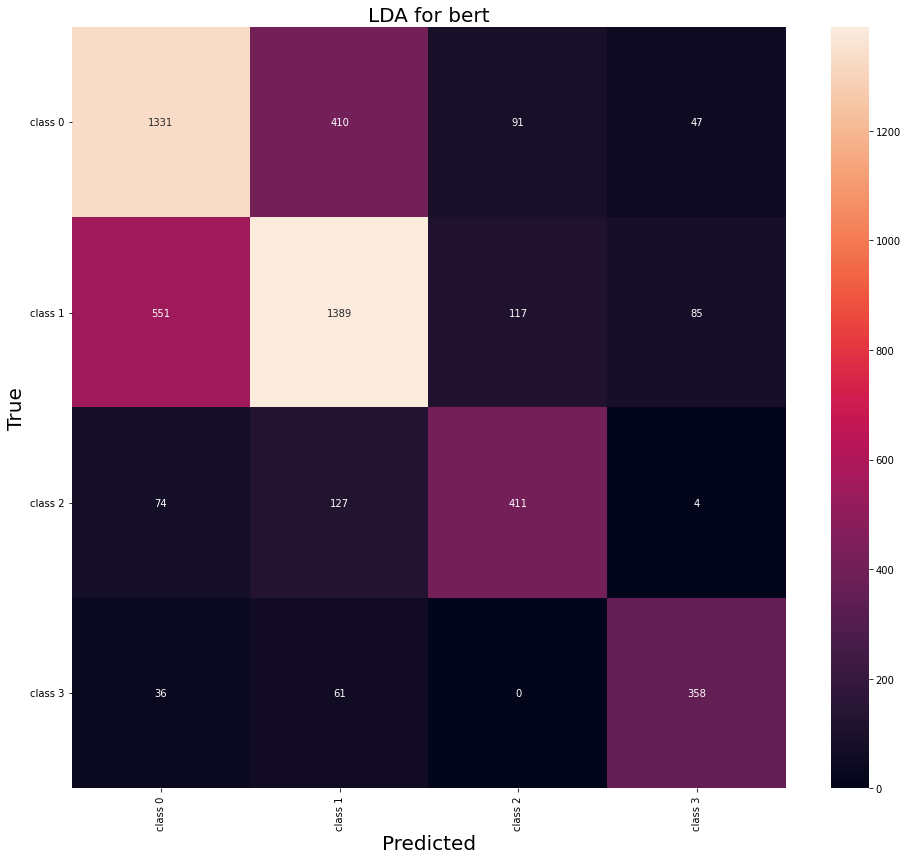

macro f1_score for LDA for bert is :0.6951362942004307%
micro f1_score for LDA for bert is :0.6851924587588374%
weighted f1_score for LDA for bert is :0.6847167461287206%

macro recall_score for LDA for bert is :0.7027089677558872%
micro recall_score for LDA for bert is :0.6851924587588374%
weighted recall_score for LDA for bert is :0.6851924587588374%

macro precision_score for LDA for bert is :0.6889717458740227%
micro precision_score for LDA for bert is :0.6851924587588374%
weighted precision_score for LDA for bert is :0.6857017266705517%

              precision    recall  f1-score   support

     class 0       0.67      0.71      0.69      1879
     class 1       0.70      0.65      0.67      2142
     class 2       0.66      0.67      0.67       616
     class 3       0.72      0.79      0.75       455

    accuracy                           0.69      5092
   macro avg       0.69      0.70      0.70      5092
weighted avg       0.69      0.69      0.68      5092



In [87]:
lda = LinearDiscriminantAnalysis(n_components = len(set(reduced_labeling))-1)
X_train, X_test, y_train, y_test = train_test_split(concated_data_bert, reduced_labeling, test_size=0.4, random_state=0)
lda.fit(X_train,y_train)
y_pred = lda.predict(X_test)
confusion_matrix_show(y_test, y_pred,lda.classes_,"LDA for bert")

### LDA for tf-idf

In [ ]:
lda = LinearDiscriminantAnalysis(n_components = len(set(reduced_labeling))-1)
X_train, X_test, y_train, y_test = train_test_split(tf_idf_vec, reduced_labeling, test_size=0.4, random_state=0)
lda.fit(X_train.toarray(),y_train)
y_pred = lda.predict(X_test.toarray())
confusion_matrix_show(y_test, y_pred,lda.classes_,"LDA for tf-idf")